<a href="https://colab.research.google.com/github/tfscruz/MATCOMP/blob/main/CRUZ_BPP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [2]:
import pandas as pd
import numpy as np
import time
import psutil
import matplotlib.pyplot as plt

In [22]:

# Define the unique items
unique_items = [
    {'ID': 'item-1', 'RAM': 16, 'CPU': 4},
    {'ID': 'item-2', 'RAM': 32, 'CPU': 8},
    {'ID': 'item-3', 'RAM': 64, 'CPU': 16},
    {'ID': 'item-4', 'RAM': 512, 'CPU': 128},
    {'ID': 'item-5', 'RAM': 128, 'CPU': 32},
    {'ID': 'item-6', 'RAM': 16, 'CPU': 4},
    {'ID': 'item-7', 'RAM': 32, 'CPU': 8},
    {'ID': 'item-8', 'RAM': 64, 'CPU': 16}
]

# Define the services
services = ['A2', 'CC7', 'B3', 'NF2', 'I3', 'AJ', 'JT1', 'ZZ', 'BB', 'HR', 'HH']

# Create a list of item dictionaries with different service relations
items = []
for i in range(6000):
    item = unique_items[i % 8].copy()
    item['ID'] = f'item-{i+1}'
    item['Services'] = np.random.choice(services)
    items.append(item)

# Create the DataFrame
df_items = pd.DataFrame(items)

# Add the Business column with random values
df_items['Business'] = np.random.choice(['BUSINESS A', 'BUSINESS B', 'BUSINESS C', 'BUSINESS D', 'BUSINESS E'], size=6000)

# Print the DataFrame
print(df_items)



             ID  RAM  CPU Services    Business
0        item-1   16    4      JT1  BUSINESS D
1        item-2   32    8      JT1  BUSINESS A
2        item-3   64   16       HR  BUSINESS E
3        item-4  512  128      CC7  BUSINESS B
4        item-5  128   32       AJ  BUSINESS B
...         ...  ...  ...      ...         ...
5995  item-5996  512  128      CC7  BUSINESS C
5996  item-5997  128   32       AJ  BUSINESS D
5997  item-5998   16    4       HR  BUSINESS D
5998  item-5999   32    8       AJ  BUSINESS B
5999  item-6000   64   16       HR  BUSINESS A

[6000 rows x 5 columns]


In [23]:
# Define the unique bins
unique_bins = [
    {'ID': 'bin-1', 'RAM': 32, 'CPU': 8},
    {'ID': 'bin-2', 'RAM': 64, 'CPU': 16},
    {'ID': 'bin-3', 'RAM': 128, 'CPU': 32},
    {'ID': 'bin-4', 'RAM': 256, 'CPU': 64},
    {'ID': 'bin-5', 'RAM': 512, 'CPU': 128}
]

# Define the Business classifications
business = ['BUSINESS A', 'BUSINESS B', 'BUSINESS C','BUSINESS D', 'BUSINESS E']

# Create a list of bin dictionaries
bins = []
for i in range(700):
    bin_item = unique_bins[i % 5].copy()
    bin_item['ID'] = f'bin-{i+1}'
    bin_item['Business'] = np.random.choice(business)
    bin_item['Monetary Cost'] = np.random.randint(10000, 1000001)
    bins.append(bin_item)

# Create the DataFrame
df_bins = pd.DataFrame(bins)

# Print the DataFrame
print(df_bins)


          ID  RAM  CPU    Business  Monetary Cost
0      bin-1   32    8  BUSINESS A         839502
1      bin-2   64   16  BUSINESS C         432958
2      bin-3  128   32  BUSINESS E         600976
3      bin-4  256   64  BUSINESS C          81161
4      bin-5  512  128  BUSINESS E         936220
..       ...  ...  ...         ...            ...
695  bin-696   32    8  BUSINESS B          92913
696  bin-697   64   16  BUSINESS E         308434
697  bin-698  128   32  BUSINESS B         983934
698  bin-699  256   64  BUSINESS E         784160
699  bin-700  512  128  BUSINESS B         926184

[700 rows x 5 columns]


In [5]:
# Create an empty DataFrame for relationships
#df_relationships = pd.DataFrame(columns=['ID', 'Services', 'Business', 'Bin', 'Service_RAM', 'Service_CPU', 'Bin_RAM', 'Bin_CPU', 'Bin_RAM_BALANCE', 'Bin_CPU_BALANCE'])

A saída de streaming foi truncada nas últimas 5000 linhas.
<ipython-input-24-6e0c80e0cf37>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_unfitted = df_unfitted.append({
<ipython-input-24-6e0c80e0cf37>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_unfitted = df_unfitted.append({
<ipython-input-24-6e0c80e0cf37>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_unfitted = df_unfitted.append({
<ipython-input-24-6e0c80e0cf37>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_unfitted = df_unfitted.append({
<ipython-input-24-6e0c80e0cf37>:66: FutureWarning: The frame.append method is deprecated and will be removed from pan

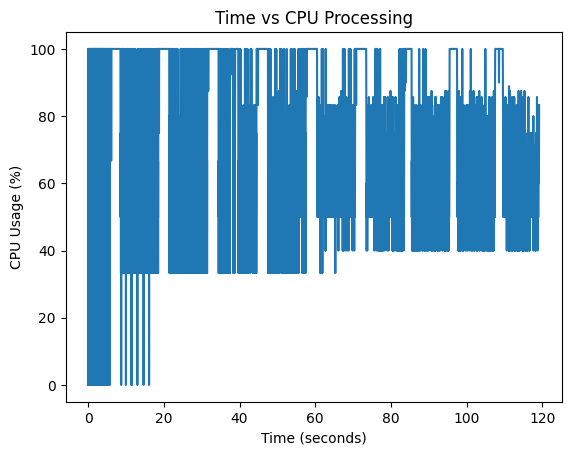

In [24]:
# Initialize an empty list to store the execution times
#execution_times = []

# Initialize lists to track time and CPU processing
time_list = []
cpu_list = []
ram_usage = []

# Perform the heuristic and measure the execution time
start_time = time.time()

# Create an empty DataFrame for fitted items
df_fitted = pd.DataFrame(columns=['Business', 'Service', 'ID', 'Bin', 'Bin_RAM_BALANCE', 'Bin_CPU_BALANCE'])

# Create an empty DataFrame for unfitted items
df_unfitted = pd.DataFrame(columns=['Business', 'Service', 'ID', 'Bin', 'Bin_RAM_BALANCE', 'Bin_CPU_BALANCE'])

# Iterate over each item in df_items
for _, item in df_items.iterrows():
    item_id = item['ID']
    item_service = item['Services']
    item_ram = item['RAM']
    item_cpu = item['CPU']
    item_business = item['Business']
    
    # Filter df_bins based on matching Business
    matching_bins = df_bins[df_bins['Business'] == item_business]
    
    # Flag to indicate if the item is fitted
    is_fitted = False
    
    # Iterate over each matching bin
    for _, bin in matching_bins.iterrows():
        bin_id = bin['ID']
        bin_ram = bin['RAM']
        bin_cpu = bin['CPU']
        bin_ram_balance = bin['RAM']
        bin_cpu_balance = bin['CPU']
        
        # Check if item fits in the bin based on the balance
        if item_ram <= bin_ram_balance and item_cpu <= bin_cpu_balance:
            # Calculate new RAM and CPU balances
            new_ram_balance = bin_ram_balance - item_ram
            new_cpu_balance = bin_cpu_balance - item_cpu
            
            # Update the bin's RAM and CPU balances
            df_bins.loc[df_bins['ID'] == bin_id, 'RAM'] = new_ram_balance
            df_bins.loc[df_bins['ID'] == bin_id, 'CPU'] = new_cpu_balance
            
            # Add fitted item to df_fitted
            df_fitted = df_fitted.append({
                'Business': item_business,
                'Service': item_service,
                'ID': item_id,
                'Bin': bin_id,
                'Bin_RAM_BALANCE': new_ram_balance,
                'Bin_CPU_BALANCE': new_cpu_balance
            }, ignore_index=True)
            
            # Set the flag to indicate the item is fitted
            is_fitted = True
            break
    
    # If the item is not fitted, add it to df_unfitted
    if not is_fitted:
        df_unfitted = df_unfitted.append({
            'Business': item_business,
            'Service': item_id,
            'ID': item_id,
            # 'Bin': np.nan,
            # 'Bin_RAM_BALANCE': np.nan,
            # 'Bin_CPU_BALANCE': np.nan
        }, ignore_index=True)

 # Calculate and store time elapsed and CPU processing for each iteration
    elapsed_time = time.time() - start_time
    cpu_percent = psutil.cpu_percent()
    ram_percent = psutil.virtual_memory().percent

    time_list.append(elapsed_time)
    cpu_list.append(cpu_percent)
    ram_usage.append(ram_percent)

# Plot time and CPU processing graph
plt.plot(time_list, cpu_list)
plt.xlabel('Time (seconds)')
plt.ylabel('CPU Usage (%)')
plt.title('Time vs CPU Processing')
plt.show()

-------------
---
---


## <center> **ANALYTICS**

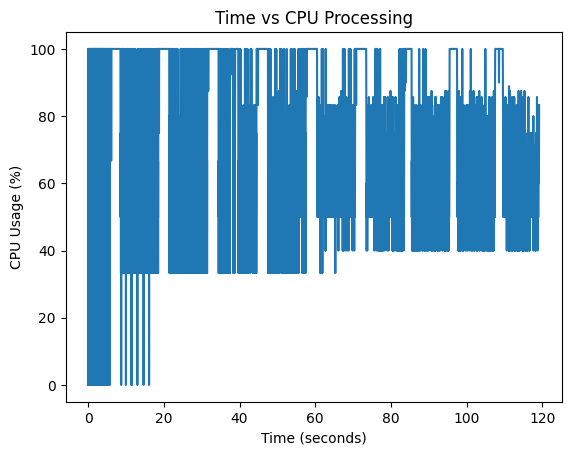

In [37]:
# Plot time and CPU processing graph
plt.plot(time_list, cpu_list)
plt.xlabel('Time (seconds)')
plt.ylabel('CPU Usage (%)')
plt.title('Time vs CPU Processing')
plt.show()

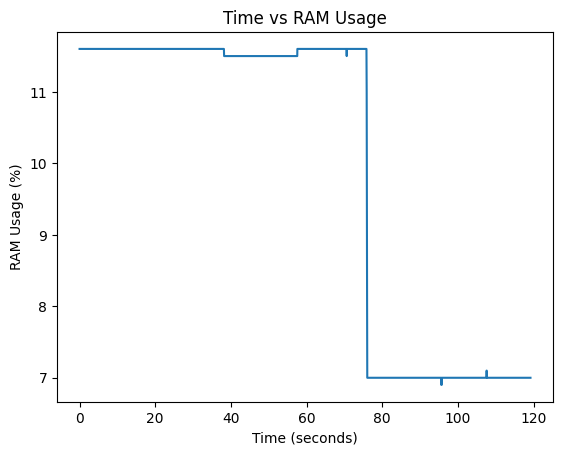

In [25]:
# Plot time and CPU processing graph
plt.plot(time_list, ram_usage)
plt.xlabel('Time (seconds)')
plt.ylabel('RAM Usage (%)')
plt.title('Time vs RAM Usage')
plt.show()

In [26]:
# Assuming you have the time and cpu_usage lists from the plot
data = {'Time': time_list, 'CPU Usage': cpu_list}
df_plot = pd.DataFrame(data)

# Print the DataFrame
print(df_plot)

            Time  CPU Usage
0       0.014557       23.6
1       0.020368      100.0
2       0.024929      100.0
3       0.029198        0.0
4       0.033113      100.0
...          ...        ...
5995  119.036620       66.7
5996  119.074275       75.0
5997  119.102206       60.0
5998  119.134939       62.5
5999  119.173266       83.3

[6000 rows x 2 columns]


In [31]:
# Assuming you have the time and ram_usage lists from the plot
data_ram = {'Time': time_list, 'RAM Usage': ram_usage}
df_plot_ram = pd.DataFrame(data_ram)

# Print the DataFrame
print(df_plot_ram)

            Time  RAM Usage
0       0.014557       11.6
1       0.020368       11.6
2       0.024929       11.6
3       0.029198       11.6
4       0.033113       11.6
...          ...        ...
5995  119.036620        7.0
5996  119.074275        7.0
5997  119.102206        7.0
5998  119.134939        7.0
5999  119.173266        7.0

[6000 rows x 2 columns]


In [32]:
print("Fitted Items:")
print(df_fitted)

Fitted Items:
        Business Service         ID      Bin Bin_RAM_BALANCE Bin_CPU_BALANCE
0     BUSINESS D     JT1     item-1    bin-7              48              12
1     BUSINESS A     JT1     item-2    bin-1               0               0
2     BUSINESS E      HR     item-3    bin-3              64              16
3     BUSINESS B     CC7     item-4   bin-40               0               0
4     BUSINESS B      AJ     item-5   bin-14             128              32
...          ...     ...        ...      ...             ...             ...
1526  BUSINESS C      A2  item-1810  bin-676               0               0
1527  BUSINESS E      ZZ  item-1815  bin-699              16               4
1528  BUSINESS C      HH  item-1816  bin-694               0               0
1529  BUSINESS C      HH  item-1838  bin-671               0               0
1530  BUSINESS E     NF2  item-1849  bin-699               0               0

[1531 rows x 6 columns]


In [33]:
# Print the unfitted items DataFrame
print("Unfitted Items:")
print(df_unfitted)

Unfitted Items:
        Business    Service         ID  Bin Bin_RAM_BALANCE Bin_CPU_BALANCE
0     BUSINESS D   item-868   item-868  NaN             NaN             NaN
1     BUSINESS D   item-884   item-884  NaN             NaN             NaN
2     BUSINESS C   item-908   item-908  NaN             NaN             NaN
3     BUSINESS C   item-964   item-964  NaN             NaN             NaN
4     BUSINESS D   item-980   item-980  NaN             NaN             NaN
...          ...        ...        ...  ...             ...             ...
4464  BUSINESS C  item-5996  item-5996  NaN             NaN             NaN
4465  BUSINESS D  item-5997  item-5997  NaN             NaN             NaN
4466  BUSINESS D  item-5998  item-5998  NaN             NaN             NaN
4467  BUSINESS B  item-5999  item-5999  NaN             NaN             NaN
4468  BUSINESS A  item-6000  item-6000  NaN             NaN             NaN

[4469 rows x 6 columns]


In [34]:
# Create a list of fitted bins
fitted_bins = df_bins[df_bins['ID'].isin(df_fitted['Bin'])]

# Create a list of unfitted bins
unfitted_bins = df_bins[~df_bins['ID'].isin(df_fitted['Bin'])]

In [35]:
# Print the lists
print("Fitted Bins:")
print(fitted_bins)

Fitted Bins:
          ID  RAM  CPU    Business  Monetary Cost
0      bin-1    0    0  BUSINESS A         839502
1      bin-2    0    0  BUSINESS C         432958
2      bin-3    0    0  BUSINESS E         600976
3      bin-4    0    0  BUSINESS C          81161
4      bin-5    0    0  BUSINESS E         936220
..       ...  ...  ...         ...            ...
695  bin-696    0    0  BUSINESS B          92913
696  bin-697    0    0  BUSINESS E         308434
697  bin-698    0    0  BUSINESS B         983934
698  bin-699    0    0  BUSINESS E         784160
699  bin-700    0    0  BUSINESS B         926184

[700 rows x 5 columns]


In [36]:
print("\nUnfitted Bins:")
print(unfitted_bins)


Unfitted Bins:
Empty DataFrame
Columns: [ID, RAM, CPU, Business, Monetary Cost]
Index: []
